# Machine Learning - CS4622 - Lab 01

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

In [ ]:
MOUNT_PATH='/content/drive'
drive.mount(MOUNT_PATH)
WORKING_DIR=f"{MOUNT_PATH}/MyDrive/ML/Lab 01"
train = pd.read_csv(f"{WORKING_DIR}/train.csv")
valid = pd.read_csv(f"{WORKING_DIR}/valid.csv")
test = pd.read_csv(f"{WORKING_DIR}/test.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels = [f"label_{i+1}" for i in range(4)]
features = [f'feature_{i+1}' for i in range(256)]
label_1 = labels[0]
label_2 = labels[1]
label_3 = labels[2]
label_4 = labels[3]

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train = {}
y_train = {}
X_valid = {}
y_valid = {}
X_test = {}
for label in labels:
    train_df = train[train[label_2].notna()] if label == label_2 else train
    valid_df = valid[valid[label_2].notna()] if label == label_2 else valid
    test_df = test
    scaler = StandardScaler()

    # Apply feature scaling to training data
    X_train[label] = pd.DataFrame(scaler.fit_transform(train_df.drop(labels, axis=1)), columns=features)
    y_train[label] = train_df[label]

    # Apply feature scaling to validation data
    X_valid[label] = pd.DataFrame(scaler.transform(valid_df.drop(labels, axis=1)), columns=features)
    y_valid[label] = valid_df[label]

    # Apply feature scaling to test data
    X_test[label] = pd.DataFrame(scaler.transform(test_df.drop(labels, axis=1)), columns=features)

In [ ]:
#NaN values have been removed from the dataset of label 2
y_train[label_2]

480      25.0
481      25.0
482      25.0
483      25.0
484      25.0
         ... 
28515    29.0
28516    29.0
28517    29.0
28518    29.0
28519    29.0
Name: label_2, Length: 28040, dtype: float64

## Label 1

###Initialize SVM model

In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

model_1_1 = svm.SVC(kernel="linear")
model_1_1.fit(X_train[label_1], y_train[label_1])

SVC(kernel='linear')

### Evaluation metrics and confusion matrix:

In [ ]:
y_pred = model_1_1.predict(X_valid[label_1])
print(metrics.confusion_matrix(y_valid[label_1],y_pred=y_pred))
print("----Before feature engineering----")
print("Accuracy: ", metrics.accuracy_score(y_valid[label_1], y_pred))
print("Precision: ", metrics.precision_score(y_valid[label_1],y_pred, average="weighted"))
print("Recall: ", metrics.recall_score(y_valid[label_1],y_pred, average="weighted"))

[[13  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]
----Before feature engineering----
Accuracy:  0.9906666666666667
Precision:  0.9914608132608133
Recall:  0.9906666666666667


### Feature selection using SelectKBest:

In [ ]:
selector = SelectKBest(f_classif, k=100)
X_new = selector.fit_transform(X_train[label_1], y_train[label_1])
print("Shape :", X_new.shape)

Shape : (28520, 100)


### SVM model with selected 100 features

In [ ]:
model_1_2 = svm.SVC(kernel="linear")
model_1_2.fit(X_new, y_train[label_1])

SVC(kernel='linear')

In [ ]:
y_pred = model_1_2.predict(selector.transform(X_valid[label_1]))
print("---Confusion Matrix after SelectKBest---")
print(metrics.confusion_matrix(y_valid[label_1],y_pred=y_pred))
print("Accuracy: ",metrics.accuracy_score(y_valid[label_1],y_pred))
print("Precision: ",metrics.precision_score(y_valid[label_1],y_pred, average="weighted"))
print("Recall: ",metrics.recall_score(y_valid[label_1],y_pred, average="weighted"))

---Confusion Matrix after SelectKBest---
[[12  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  1]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  1  0  9]]
Accuracy:  0.976
Precision:  0.9774185666185666
Recall:  0.976


### SVM model with PCA transformed features

In [ ]:
pca = PCA(n_components=0.95,svd_solver='full')
pca.fit(X_train[label_1])
X_train_df = pd.DataFrame(pca.transform(X_train[label_1]))
X_valid_df = pd.DataFrame(pca.transform(X_valid[label_1]))
print("Shape :", X_train_df.shape)

Shape : (28520, 67)


In [ ]:
model_1_3 = svm.SVC(kernel="linear")
model_1_3.fit(X_train_df, y_train[label_1])
y_pred = model_1_3.predict(X_valid_df)
print("---Confusion Matrix after PCA---")
print(metrics.confusion_matrix(y_valid[label_1],y_pred=y_pred))
print("Accuracy: ", metrics.accuracy_score(y_valid[label_1], y_pred))
print("Precision: ", metrics.precision_score(y_valid[label_1], y_pred, average="weighted"))
print("Recall: ", metrics.recall_score(y_valid[label_1], y_pred, average="weighted"))

---Confusion Matrix after PCA---
[[12  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 12 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0 10]]
Accuracy:  0.9813333333333333
Precision:  0.9835733337182255
Recall:  0.9813333333333333


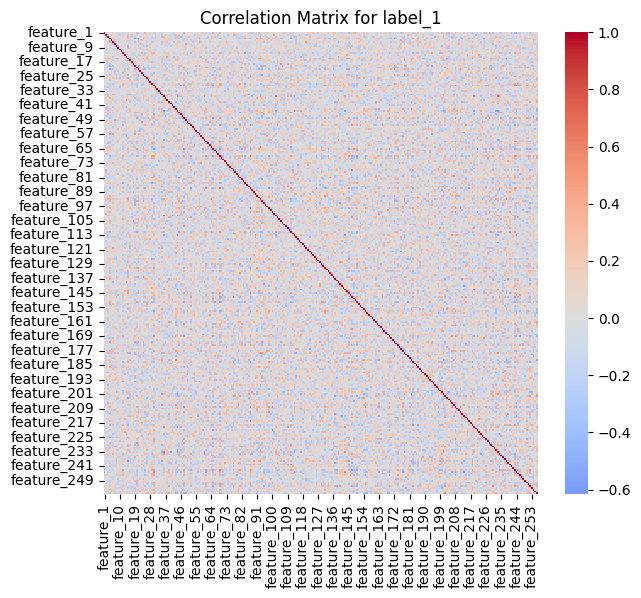

In [ ]:
corr_matrix = X_train[label_1].corr()
# corr_thresh = 0.5
# filtered_corr_matrix = corr_matrix[(corr_matrix > corr_thresh) | (corr_matrix < -corr_thresh)]
plt.figure(figsize=(7, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for label_1')
plt.show()

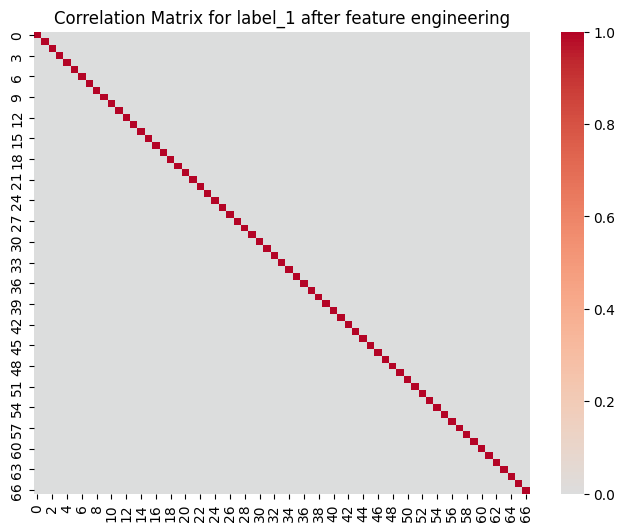

In [ ]:
corr_matrix = X_train_df.corr()
# corr_thresh = 0.5
# filtered_corr_matrix = corr_matrix[(corr_matrix > corr_thresh) | (corr_matrix < -corr_thresh)]
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for label_1 after feature engineering')
plt.show()

### Testing

In [ ]:
X_test_df = pd.DataFrame(pca.transform(X_test[label_1]))
y_test_pred = model_1_3.predict(X_test_df)
y_test_before = model_1_1.predict(X_test[label_1])

In [ ]:
y_test_pred_df = pd.DataFrame({'Predicted_Label': y_test_pred})
y_test_before_df = pd.DataFrame({'Before_Label': y_test_before})

result_df = pd.concat([y_test_before_df, y_test_pred_df, X_test_df], axis=1)

result_df.to_csv(f"{WORKING_DIR}/result1.csv", index=False)

## Label 3

In [ ]:
train[label_3].info()

<class 'pandas.core.series.Series'>
RangeIndex: 28520 entries, 0 to 28519
Series name: label_3
Non-Null Count  Dtype
--------------  -----
28520 non-null  int64
dtypes: int64(1)
memory usage: 222.9 KB


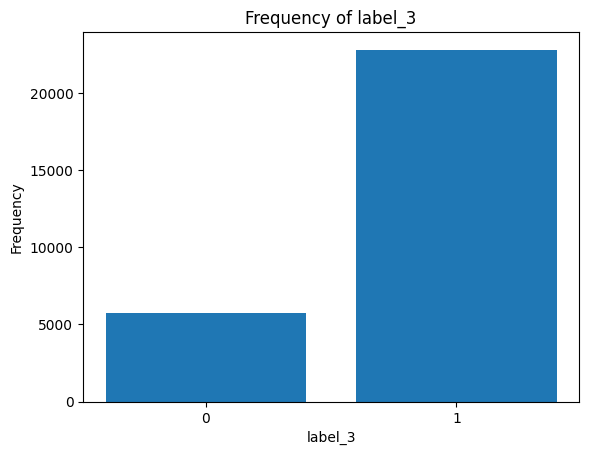

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

value_counts = train[label_3].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel(label_3)
plt.ylabel('Frequency')
plt.title('Frequency of '+ label_3)
plt.xticks(value_counts.index)
plt.show()

In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
model_3_1 = svm.SVC(kernel="linear")
model_3_1.fit(X_train[label_3], y_train[label_3])

SVC(kernel='linear')

In [ ]:
y_pred = model_3_1.predict(X_valid[label_3])
print(metrics.confusion_matrix(y_valid[label_3],y_pred=y_pred))
print("----Before feature engineering----")
print("Accuracy: ", metrics.accuracy_score(y_valid[label_3], y_pred))
print("Precision: ", metrics.precision_score(y_valid[label_3],y_pred, average="weighted"))
print("Recall: ", metrics.recall_score(y_valid[label_3],y_pred, average="weighted"))

[[142   0]
 [  1 607]]
----Before feature engineering----
Accuracy:  0.9986666666666667
Precision:  0.9986759906759908
Recall:  0.9986666666666667


### Feature selection using SelectKBest:

In [ ]:
selector = SelectKBest(f_classif, k=15)
X_new = selector.fit_transform(X_train[label_3], y_train[label_3])
print("Shape :", X_new.shape)

Shape : (28520, 15)


In [ ]:
model_3_2 = svm.SVC(kernel="linear")
model_3_2.fit(X_new, y_train[label_3])

SVC(kernel='linear')

In [ ]:
y_pred = model_3_2.predict(selector.transform(X_valid[label_3]))
print("---Confusion Matrix after SelectKBest---")
print(metrics.confusion_matrix(y_valid[label_3],y_pred=y_pred))
print("Accuracy: ",metrics.accuracy_score(y_valid[label_3],y_pred))
print("Precision: ",metrics.precision_score(y_valid[label_3],y_pred, average="weighted"))
print("Recall: ",metrics.recall_score(y_valid[label_3],y_pred, average="weighted"))

---Confusion Matrix after SelectKBest---
[[137   5]
 [  7 601]]
Accuracy:  0.984
Precision:  0.9841076274294095
Recall:  0.984


### PCA

In [ ]:
pca = PCA(n_components=0.95,svd_solver='full')
pca.fit(X_train[label_3])
X_train_df = pd.DataFrame(pca.transform(X_train[label_3]))
X_valid_df = pd.DataFrame(pca.transform(X_valid[label_3]))
print("Shape :", X_train_df.shape)

Shape : (28520, 67)


In [ ]:
model_3_3 = svm.SVC(kernel="linear")
model_3_3.fit(X_train_df, y_train[label_3])
y_pred = model_3_3.predict(X_valid_df)
print("---Confusion Matrix after PCA---")
print(metrics.confusion_matrix(y_valid[label_3],y_pred=y_pred))
print("Accuracy: ", metrics.accuracy_score(y_valid[label_3], y_pred))
print("Precision: ", metrics.precision_score(y_valid[label_3], y_pred, average="weighted"))
print("Recall: ", metrics.recall_score(y_valid[label_3], y_pred, average="weighted"))

---Confusion Matrix after PCA---
[[141   1]
 [  0 608]]
Accuracy:  0.9986666666666667
Precision:  0.9986688560481665
Recall:  0.9986666666666667


### Testing

In [ ]:
X_test_df = pd.DataFrame(selector.transform(X_valid[label_3]))
y_test_pred_3 = model_3_2.predict(selector.transform(X_test[label_3]))
y_test_before_3 = model_3_1.predict(X_test[label_3])

In [ ]:
y_test_pred_df_3 = pd.DataFrame({'Predicted_Label': y_test_pred_3})
y_test_before_df_3 = pd.DataFrame({'Before_Label': y_test_before_3})

result_df = pd.concat([y_test_before_df_3, y_test_pred_df_3, X_test_df], axis=1)

result_df.to_csv(f"{WORKING_DIR}/result3.csv", index=False)

## Label 4

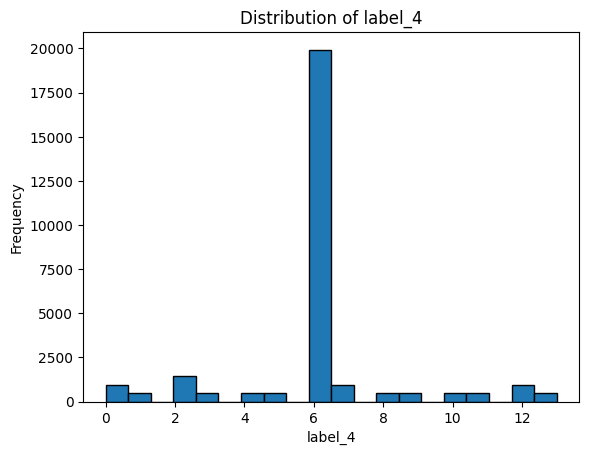

6     19938
2      1449
0       955
12      954
7       938
13      482
1       481
11      480
10      480
3       479
5       478
9       472
4       469
8       465
Name: label_4, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Create a histogram
plt.hist(y_train[label_4], bins=20, edgecolor='k')
plt.xlabel(label_4)
plt.ylabel('Frequency')
plt.title(f'Distribution of {label_4}')
plt.show()

frequency_counts = y_train[label_4].value_counts()
train[label_4].value_counts()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import hamming_loss, jaccard_score

model_4_1 = KNeighborsClassifier(n_neighbors=5)
model_4_1.fit(X_train[label_4], y_train[label_4])
y_pred = model_4_1.predict(X_valid[label_4])
y_pred_before = model_4_1.predict(X_test[label_4])

In [ ]:
print(metrics.confusion_matrix(y_valid[label_4],y_pred=y_pred))
print("Accuracy: ", metrics.accuracy_score(y_valid[label_4], y_pred))
print("Precision: ", metrics.precision_score(y_valid[label_4],y_pred, average="weighted"))
print("Recall: ", metrics.recall_score(y_valid[label_4],y_pred, average="weighted"))

[[ 21   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  27   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  10   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 532   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1  31   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0  18   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  17   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0  25   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  10]]
Accuracy:  0.9946666666666667
Precision:  0.9947064676616915
Recall:  0.9946666666666667


In [ ]:
from imblearn.over_sampling import RandomOverSampler

resampler = RandomOverSampler(sampling_strategy='auto')
x_train_resampled, y_train_resampled = resampler.fit_resample(X_train[label_4], y_train[label_4])

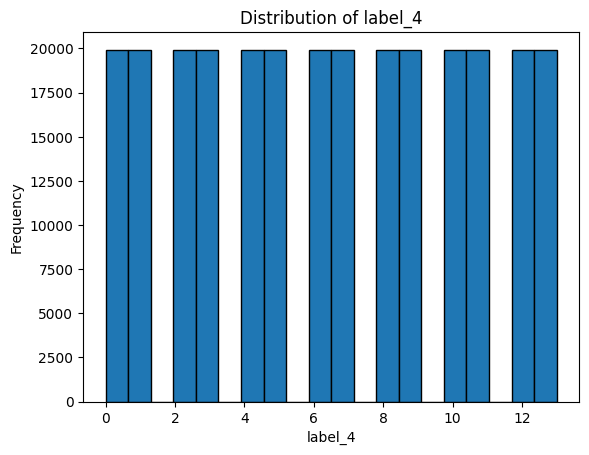

In [ ]:
plt.hist(y_train_resampled, bins=20, edgecolor='k')
plt.xlabel(label_4)
plt.ylabel('Frequency')
plt.title(f'Distribution of {label_4}')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95,svd_solver='full')
pca.fit(x_train_resampled)
X_train_df = pd.DataFrame(pca.transform(x_train_resampled))
X_valid_df = pd.DataFrame(pca.transform(X_valid[label_4]))
X_test_df = pd.DataFrame(pca.transform(X_test[label_4]))
print("Shape :", X_train_df.shape)

Shape : (279132, 65)


In [ ]:
model_4_2 = KNeighborsClassifier(n_neighbors=5)
model_4_2.fit(X_train_df, y_train_resampled)
y_pred = model_4_2.predict(X_valid_df)
y_pred_after = model_4_2.predict(X_test_df)

In [ ]:
print(metrics.confusion_matrix(y_valid[label_4],y_pred=y_pred))
print("Accuracy: ", metrics.accuracy_score(y_valid[label_4], y_pred))
print("Precision: ", metrics.precision_score(y_valid[label_4],y_pred, average="weighted"))
print("Recall: ", metrics.recall_score(y_valid[label_4],y_pred, average="weighted"))


[[ 21   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  11   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  27   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  15   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  10   1   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0 530   0   0   0   0   0   1   0]
 [  0   0   0   0   0   0   0  32   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  19   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  17   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  26   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  10]]
Accuracy:  0.996
Precision:  0.9961950198786357
Recall:  0.996


In [ ]:
y_pred_df = pd.DataFrame({'Predicted_Label': y_pred_after})
y_before_df = pd.DataFrame({'Before_Label': y_pred_before})

result_df = pd.concat([y_before_df, y_pred_df, X_test_df], axis=1)

result_df.to_csv(f"{WORKING_DIR}/result4.csv", index=False)

## Label 2

<class 'pandas.core.series.Series'>
RangeIndex: 28520 entries, 0 to 28519
Series name: label_2
Non-Null Count  Dtype  
--------------  -----  
28040 non-null  float64
dtypes: float64(1)
memory usage: 222.9 KB


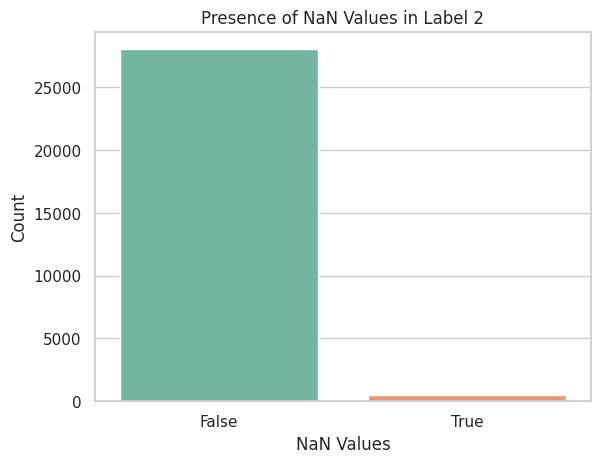

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

train[label_2].info()

nan_mask = train[label_2].isna()

sns.set(style="whitegrid")

sns.countplot(x=nan_mask, palette="Set2")

plt.xlabel("NaN Values")
plt.ylabel("Count")
plt.title("Presence of NaN Values in Label 2")

plt.show()

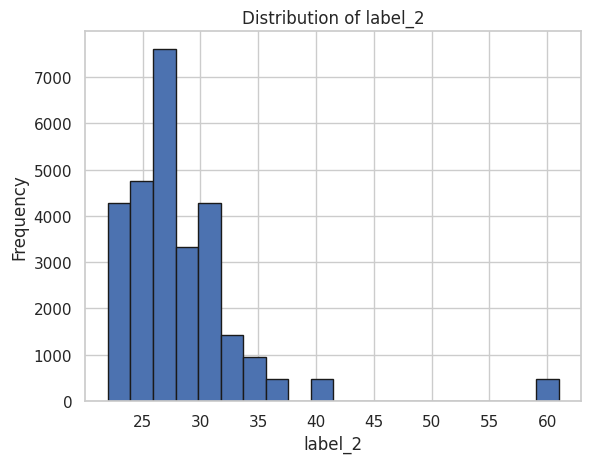

26.0    4762
25.0    2849
27.0    2846
23.0    2842
31.0    2385
24.0    1906
28.0    1899
30.0    1894
22.0    1432
29.0    1424
33.0     945
36.0     481
35.0     480
34.0     478
32.0     476
41.0     474
61.0     467
Name: label_2, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(y_train[label_2], bins=20, edgecolor='k')
plt.xlabel(label_2)
plt.ylabel('Frequency')
plt.title(f'Distribution of {label_2}')
plt.show()

train[label_2].value_counts()

In [ ]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.impute import SimpleImputer

model_2_1 = xg.XGBRegressor()

model_2_1.fit(X_train[label_2], y_train[label_2])

pred_y_before = model_2_1.predict(X_valid[label_2])
pred_y_before_test = model_2_1.predict(X_test[label_2])

In [ ]:
# RMSE Computation
print("RMSE : % f" %np.sqrt(MSE(y_valid[label_2], pred_y_before)))

RMSE :  3.290057


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95,svd_solver='full')
pca.fit(X_train[label_2])
X_train_df = pd.DataFrame(pca.transform(X_train[label_2]))
X_valid_df = pd.DataFrame(pca.transform(X_valid[label_2]))
X_test_df = pd.DataFrame(pca.transform(X_test[label_2]))
print("Shape :", X_train_df.shape)

Shape : (28040, 67)


In [ ]:
model_2_2 = xg.XGBRegressor()
model_2_2.fit(X_train_df, y_train[label_2])
pred_y_after = model_2_2.predict(X_valid_df)
pred_y_after_test = model_2_2.predict(X_test_df)

# RMSE Computation
print("RMSE after PCA: % f" %np.sqrt(MSE(y_valid[label_2], pred_y_after)))

RMSE after PCA:  3.675159


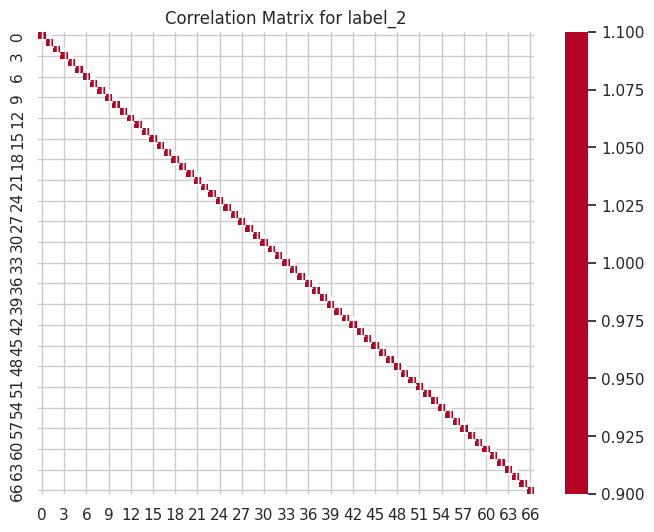

In [ ]:
corr_matrix = X_train_df.corr()
corr_thresh = 0.1
filtered_corr_matrix = corr_matrix[(corr_matrix > corr_thresh) | (corr_matrix < -corr_thresh)]
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for label_2')
plt.show()

In [ ]:
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,1.000000e+00,-5.500653e-17,-1.166318e-16,-1.351364e-16,-3.585766e-16,-2.367682e-16,-2.836398e-16,3.460293e-16,-1.996620e-16,-5.397459e-16,...,3.480697e-17,9.048802e-17,-3.194223e-16,1.514262e-17,3.123231e-16,2.307497e-16,-4.439456e-17,-2.220476e-16,5.953428e-16,1.826057e-16
1,-5.500653e-17,1.000000e+00,6.557658e-17,1.699708e-16,4.037571e-16,2.813396e-16,-3.412700e-16,7.232033e-16,4.689224e-16,7.212243e-16,...,2.292660e-16,-3.181043e-17,1.186749e-16,1.344669e-17,-1.976497e-16,7.052000e-17,-5.160895e-16,-8.554623e-16,2.400733e-16,-2.687778e-16
2,-1.166318e-16,6.557658e-17,1.000000e+00,-3.252325e-16,2.267328e-17,-3.582633e-16,-3.207584e-16,1.018127e-15,-1.059404e-17,-5.183330e-16,...,-5.824407e-16,7.885728e-16,1.045492e-16,-1.817242e-16,2.429855e-16,-7.808100e-16,-3.766760e-17,8.010398e-18,1.593673e-16,1.414376e-16
3,-1.351364e-16,1.699708e-16,-3.252325e-16,1.000000e+00,-2.025195e-16,-2.923958e-16,-1.944804e-16,1.672980e-16,-6.017840e-16,-1.855683e-16,...,-8.879961e-17,5.106746e-16,-1.644022e-16,-2.905313e-16,4.425709e-16,-5.548154e-16,9.821628e-17,-1.469699e-16,-2.338728e-16,-2.180177e-17
4,-3.585766e-16,4.037571e-16,2.267328e-17,-2.025195e-16,1.000000e+00,-1.901999e-15,-9.533159e-17,-8.297303e-17,-5.075697e-17,-5.474461e-16,...,-6.023449e-16,3.135535e-17,-6.012424e-16,3.620273e-16,-1.257870e-17,3.575460e-16,2.369625e-16,-1.065692e-16,-6.782082e-17,-5.402181e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,2.307497e-16,7.052000e-17,-7.808100e-16,-5.548154e-16,3.575460e-16,2.303285e-16,2.440164e-16,8.172052e-16,6.674795e-17,-5.147684e-16,...,-5.616619e-17,-3.447689e-16,4.491533e-16,2.283306e-16,-3.241878e-16,1.000000e+00,7.848388e-16,5.691858e-16,4.112271e-16,4.166930e-17
63,-4.439456e-17,-5.160895e-16,-3.766760e-17,9.821628e-17,2.369625e-16,4.591467e-17,3.862113e-16,-2.624975e-17,-2.327244e-16,4.890793e-17,...,5.558965e-17,6.010603e-16,1.484051e-16,-8.432758e-16,-1.047522e-15,7.848388e-16,1.000000e+00,6.973466e-16,8.229037e-17,6.604377e-16
64,-2.220476e-16,-8.554623e-16,8.010398e-18,-1.469699e-16,-1.065692e-16,1.110005e-16,1.393925e-16,-3.419150e-17,-3.042565e-16,-5.178162e-16,...,-2.050175e-16,7.521865e-17,-2.285225e-16,1.320614e-17,-3.094865e-16,5.691858e-16,6.973466e-16,1.000000e+00,-6.558486e-16,1.137444e-16
65,5.953428e-16,2.400733e-16,1.593673e-16,-2.338728e-16,-6.782082e-17,-1.845843e-16,-6.438405e-17,7.820993e-17,-6.370323e-17,1.186938e-16,...,-2.081808e-16,-1.315435e-16,-9.529609e-16,2.914916e-16,4.994710e-17,4.112271e-16,8.229037e-17,-6.558486e-16,1.000000e+00,-3.396395e-16


### Testing

In [ ]:
y_test_pred_df = pd.DataFrame({'Predicted_Label': pred_y_after_test})
y_test_before_df = pd.DataFrame({'Before_Label': pred_y_before_test})

result_df = pd.concat([y_test_before_df, y_test_pred_df, X_test_df], axis=1)

result_df.to_csv(f"{WORKING_DIR}/result2.csv", index=False)